In [302]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

****Loading dataset into train_test****

In [303]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

****Checking for the shape of the dataset****

In [304]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


****Visualizing dataset****

5


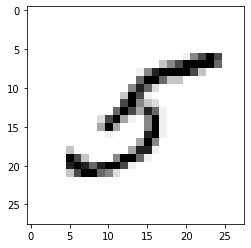

In [305]:
image_index = 35
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

In [306]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


****since the structure of the data is not normalized to 28, 28 dimension we have to normalized the dataset by reshaping it to (M X N X 1) by dividing it by 255****

In [307]:
img_row, img_col = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_row, img_col, 1)
X_test = X_test.reshape(X_test.shape[0], img_row, img_col, 1)
X_train.shape

(60000, 28, 28, 1)

****Categorizing the digit into 10 using to_categorical method for easy prediction ****

In [308]:
digit_class = 10
y_train_cat = to_categorical(y_train, digit_class)
y_test_cat = to_categorical(y_test, digit_class)

****Model Design****

In [309]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [310]:
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

In [311]:
model.add(Dropout(0.25))

In [312]:
model.add(Flatten())

In [313]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(digit_class, activation='softmax'))


In [314]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [315]:
batch_size = 200
epochs = 20

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/20
300/300 [==============================] - 4s 11ms/step - loss: 3.6486 - accuracy: 0.8097 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 2/20
300/300 [==============================] - 3s 10ms/step - loss: 0.1188 - accuracy: 0.9653 - val_loss: 0.0540 - val_accuracy: 0.9820
Epoch 3/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0970 - accuracy: 0.9705 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 4/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0766 - accuracy: 0.9781 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 5/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0441 - val_accuracy: 0.9865
Epoch 6/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0363 - val_accuracy: 0.9881
Epoch 7/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0527 - accuracy: 0.9851 - val_loss: 0.0327 - val_accuracy: 0.9889

In [316]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

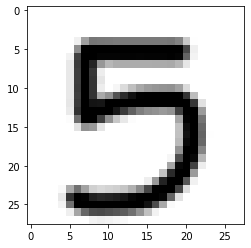

In [317]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [318]:
gray = gray.reshape(1, img_row, img_col, 1)

In [319]:
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

7
